In [84]:
import pandas as pd
import language_tool_python

In [85]:
data = pd.read_csv('./train.csv')

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(data, data, test_size = 0.3,random_state=50)


In [87]:
def grammercheck(df):
    tool = language_tool_python.LanguageTool('en-US')
    counts = {'counts':{},'score':{}}
    for i in df.index:
        matches = tool.check(df['full_text'][i])
        counts['counts'][i] = len(matches)
        counts['score'][i] = (str(df['grammar'][i]))
    return counts

In [88]:

def getAvg(counts):
    sums = {"1.0":0,
    "1.5":0,
    "2.0":0,
    "2.5":0,
    "3.0":0,
    "3.5":0,
    "4.0":0,
    "4.5":0,
    "5.0":0}
    n = {"1.0":0,
    "1.5":0,
    "2.0":0,
    "2.5":0,
    "3.0":0,
    "3.5":0,
    "4.0":0,
    "4.5":0,
    "5.0":0}
    avg = {}
    for i in counts['counts'].keys():
        sums[counts['score'][i]] += counts['counts'][i]
        n[counts['score'][i]] += 1
        
    for sum in sums.keys():
        avg[sum] = (sums[sum])/(n[sum])
    return avg

In [89]:

def getMost(counts):
    sums = {"1.0":[],
    "1.5":[],
    "2.0":[],
    "2.5":[],
    "3.0":[],
    "3.5":[],
    "4.0":[],
    "4.5":[],
    "5.0":[]}
    n = {"1.0":0,
    "1.5":0,
    "2.0":0,
    "2.5":0,
    "3.0":0,
    "3.5":0,
    "4.0":0,
    "4.5":0,
    "5.0":0}
    avg = {}
    for i in counts['counts'].keys():
        sums[counts['score'][i]].append(counts['counts'][i])
            
        
    
    return sums

In [90]:
counts = grammercheck(x_train)


In [91]:
counts["score"]

{38: '4.0',
 909: '4.5',
 639: '3.5',
 1073: '4.5',
 2322: '3.0',
 637: '2.5',
 757: '2.0',
 2446: '2.0',
 1820: '2.5',
 2071: '3.0',
 786: '4.5',
 2051: '3.5',
 2097: '4.0',
 2914: '3.5',
 182: '3.0',
 305: '3.5',
 1072: '3.0',
 1936: '3.0',
 3874: '3.5',
 1872: '2.5',
 119: '2.5',
 3172: '2.5',
 2405: '3.0',
 1670: '2.5',
 1003: '3.0',
 10: '3.5',
 1514: '2.5',
 3728: '3.5',
 2956: '3.0',
 1674: '3.0',
 2519: '4.0',
 3663: '4.5',
 387: '4.0',
 1066: '3.5',
 3502: '2.0',
 2351: '3.5',
 3400: '3.5',
 27: '4.0',
 1284: '3.0',
 2657: '3.0',
 2445: '2.0',
 1507: '3.0',
 1183: '3.0',
 1230: '3.0',
 379: '3.0',
 3822: '3.5',
 513: '3.5',
 466: '3.0',
 426: '3.0',
 1648: '3.0',
 1539: '3.0',
 1983: '3.5',
 1543: '2.0',
 1199: '3.5',
 2454: '2.5',
 841: '3.5',
 1705: '3.0',
 3382: '2.5',
 1076: '4.0',
 1320: '3.0',
 1153: '2.5',
 3253: '3.0',
 1606: '3.0',
 3626: '3.0',
 3286: '3.0',
 312: '3.0',
 1714: '3.0',
 1236: '4.0',
 2240: '3.5',
 1765: '5.0',
 3697: '3.5',
 1298: '4.5',
 2093: '2.0',

In [92]:

avg = getAvg(counts)

In [93]:
def grammarScoring(avg, test):
    gScores = {}
    testCount = grammercheck(test)
    
    for ind in testCount['counts'].keys():
        val = testCount['counts'][ind]
        if val <= avg["5.0"]:
            gScores[ind] = 5.0
        elif val > avg["5.0"] and  val <= avg["4.5"]:
            gScores[ind] = 4.5
        elif val > avg["4.5"] and  val <= avg["4.0"]:
            gScores[ind] = 4.0
        elif val > avg["4.0"] and  val <= avg["3.5"]:
            gScores[ind] = 3.5
        elif val > avg["3.5"] and  val <= avg["3.0"]:
            gScores[ind] = 3.0
        elif val > avg["3.0"] and  val <= avg["2.5"]:
            gScores[ind] =2.5
        elif val > avg["2.5"] and  val <= avg["2.0"]:
            gScores[ind] =2.0
        elif val > avg["2.0"] and  val <= avg["1.5"]:
            gScores[ind] =1.5
        else:
            gScores[ind] = 1.0
        

    return gScores

In [101]:
def score_split(scores):
    keys = []
    val = []
    for k in scores.keys():
        keys.append(k)
        val.append(scores[k])
    return keys, val

In [94]:
train_gscores = grammarScoring(avg, x_train)
test_gscores = grammarScoring(avg, x_test)

In [97]:
avg

{'1.0': 69.0,
 '1.5': 43.666666666666664,
 '2.0': 33.08831168831169,
 '2.5': 26.476112026359143,
 '3.0': 22.077474892395983,
 '3.5': 18.275290215588722,
 '4.0': 14.759197324414716,
 '4.5': 11.36,
 '5.0': 12.48}

In [98]:
sum = getMost(counts)

In [99]:
from statistics import mode
mode(sum['5.0'])
print(sum["5.0"])

[3, 14, 5, 5, 8, 11, 7, 8, 10, 27, 9, 4, 3, 4, 110, 3, 8, 14, 5, 16, 8, 8, 10, 6, 6]


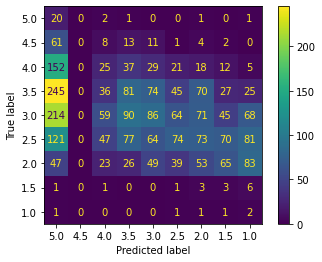

0.12568505663134819


In [134]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
key, val = score_split(train_gscores)
res = pd.Series(train_gscores)
res = res.astype("string")
tru = x_train["grammar"].astype("string")
label=["5.0", "4.5", "4.0","3.5","3.0","2.5","2.0","1.5","1.0"]
confusion_matrix = metrics.confusion_matrix(tru, res,labels=label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label)

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(tru, res)
print(Accuracy)


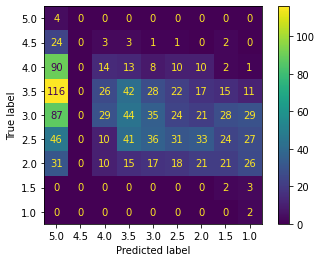

0.12862010221465076


In [135]:
res = pd.Series(test_gscores)
res = res.astype("string")
tru = x_test["grammar"].astype("string")
confusion_matrix = metrics.confusion_matrix(tru, res,labels=label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label)

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(tru, res)
print(Accuracy)


In [129]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
train = pd.Series(counts["counts"])
train = train.astype("string")
train = train.to_numpy()
train = train.reshape(-1, 1)
ty = pd.Series(counts["score"])
ty = ty.astype("string")

tc = grammercheck(x_test)
test =  pd.Series(tc["counts"])
test = test.astype("string")
test = test.to_numpy()
test = test.reshape(-1, 1)
gnb = GaussianNB()
y_pred = gnb.fit(train, ty).predict(test)



In [130]:
y_pred

array(['3.5', '3.5', '3.5', ..., '3.0', '3.0', '2.5'], dtype='<U3')

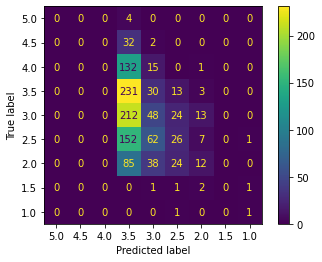

0.2708688245315162


In [136]:
tru = x_test["grammar"].astype("string")
confusion_matrix = metrics.confusion_matrix(tru, y_pred,labels=label)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = label)

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(tru, y_pred)
print(Accuracy)
print(gnb.score())


In [143]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train, ty)

In [ ]:
print(clf.predit(test))

array([8, 0, 1, ..., 1, 1, 6], dtype=int32)